1. Data Understanding

In [1]:
import pandas as pd
# Loading the re-uploaded training data
train_data = pd.read_csv('./dataset/train.csv')

# Displaying the first few rows of the training data
train_data.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


The training data has been successfully loaded, and we can observe the following columns:

1. ClaimNumber: The unique identifier for the claim.
2. DateTimeOfAccident: The date and time of the accident.
3. DateReported: The date when the accident was reported.
4. Age: Age of the claimant.
5. Gender: Gender of the claimant.
6. MaritalStatus: Marital status of the claimant.
7. DependentChildren: Number of dependent children.
8. DependentsOther: Number of other dependents.
9. WeeklyWages: Weekly wages of the claimant.
10. PartTimeFullTime: Indicator of part-time or full-time employment.
11. HoursWorkedPerWeek: Number of hours worked per week.
12. DaysWorkedPerWeek: Number of days worked per week.
13. ClaimDescription: Description of the claim.
14. InitialIncurredCalimsCost: Initial cost of the claim.
15. UltimateIncurredClaimCost: Ultimate cost of the claim.

Statistical Summary

In [2]:
# Displaying the statistical summary of the numerical variables
train_data.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,5.400000e+04,5.400000e+04
mean,33.842370,0.119185,0.009944,416.364807,37.735084,4.905759,7.841146e+03,1.100337e+04
std,12.122165,0.517780,0.109348,248.638669,12.568704,0.552129,2.058408e+04,3.339099e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02,9.263384e+02
50%,32.000000,0.000000,0.000000,392.200000,38.000000,5.000000,2.000000e+03,3.371242e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03,8.197249e+03
max,81.000000,9.000000,5.000000,7497.000000,640.000000,7.000000,2.000000e+06,4.027136e+06


Here i find that interesting 
1. DependentChildren: Ranges from 0 to 9, with most claimants having no dependent children.
2. DependentsOther: Ranges from 0 to 5, with most claimants having no other dependents.
3. DaysWorkedPerWeek: Ranges from 1 to 7, with most claimants working 5 days a week.
4. InitialIncurredCalimsCost: Ranges from 1 to 2,000,000, indicating significant variation in initial claim costs.
5. UltimateIncurredClaimCost: Ranges from approximately 121.89 to 4,027,136, indicating significant variation in ultimate claim costs.

2. Data Preprocessing

In [3]:
# Displaying the data types of each column
data_types = train_data.dtypes

# Checking for missing values in each column
missing_values = train_data.isnull().sum()

# Combining the data types and missing values information
data_overview = pd.DataFrame({'Data Types': data_types, 'Missing Values': missing_values})
data_overview

,Data Types,Missing Values
ClaimNumber,object,0
DateTimeOfAccident,object,0
DateReported,object,0
Age,int64,0
Gender,object,0
MaritalStatus,object,29
DependentChildren,int64,0
DependentsOther,int64,0
WeeklyWages,float64,0
PartTimeFullTime,object,0


The data types and missing value analysis reveals the following:

* ClaimNumber, DateTimeOfAccident, DateReported, Gender, MaritalStatus, PartTimeFullTime, and ClaimDescription are object types (likely strings).
* Age, DependentChildren, DependentsOther, DaysWorkedPerWeek, and InitialIncurredCalimsCost are integer types.
WeeklyWages, HoursWorkedPerWeek, and UltimateIncurredClaimCost are float types.
* There are 29 missing values in the MaritalStatus column, which may require handling.

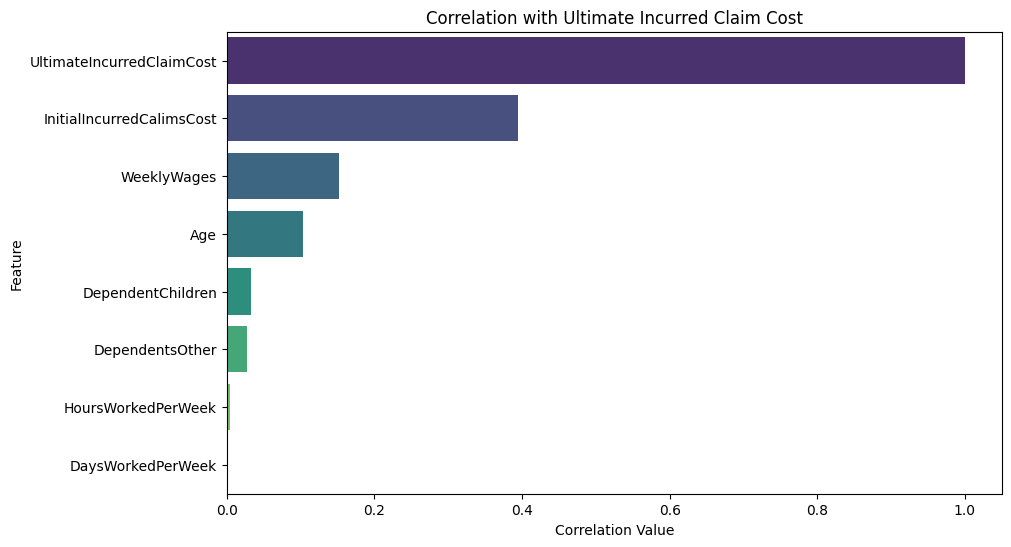

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying numerical features in the dataset
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculating the correlation matrix for numerical features
correlation_matrix = train_data[numerical_features].corr()

# Focusing on the correlation with the target variable "UltimateIncurredClaimCost"
correlations_with_target = correlation_matrix["UltimateIncurredClaimCost"].sort_values(ascending=False)

# Convert correlations with target into a DataFrame
correlations_data = pd.DataFrame(correlations_with_target).reset_index()
correlations_data.columns = ['Feature', 'Correlation']

# Create the barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlations_data, palette='viridis')

plt.title('Correlation with Ultimate Incurred Claim Cost')
plt.xlabel('Correlation Value')
plt.ylabel('Feature')
plt.show()

Based the diagram, here my keypoint :
1. InitialIncurredCalimsCost: Positive correlation of approximately 0.395. This indicates that as the initial incurred claims cost increases, the ultimate incurred claim cost tends to increase as well.
2. WeeklyWages: Positive correlation of approximately 0.152. This suggests that higher weekly wages are associated with higher ultimate incurred claim costs.
3. Age: Positive correlation of approximately 0.103. Older individuals may have higher ultimate incurred claim costs

Handling Missing Values

To handle these missing values, i'll fill them with the mode of the MaritalStatus column, which represents the most frequently occurring value.

In [5]:
# Filling missing values in the 'MaritalStatus' column with the mode
marital_status_mode = train_data['MaritalStatus'].mode().iloc[0]
train_data['MaritalStatus'].fillna(marital_status_mode, inplace=True)

# Verifying that there are no more missing values
missing_values_after_filling = train_data.isnull().sum()
missing_values_after_filling[missing_values_after_filling > 0]

Series([], dtype: int64)

Handling Outliers
for identify the outlier we can do :
Visualize Distributions: Plot the distribution of the features using box plots or histograms to visualize potential outliers.
Z-Score Analysis: Calculate the Z-scores for the features to identify observations that are far from the mean.

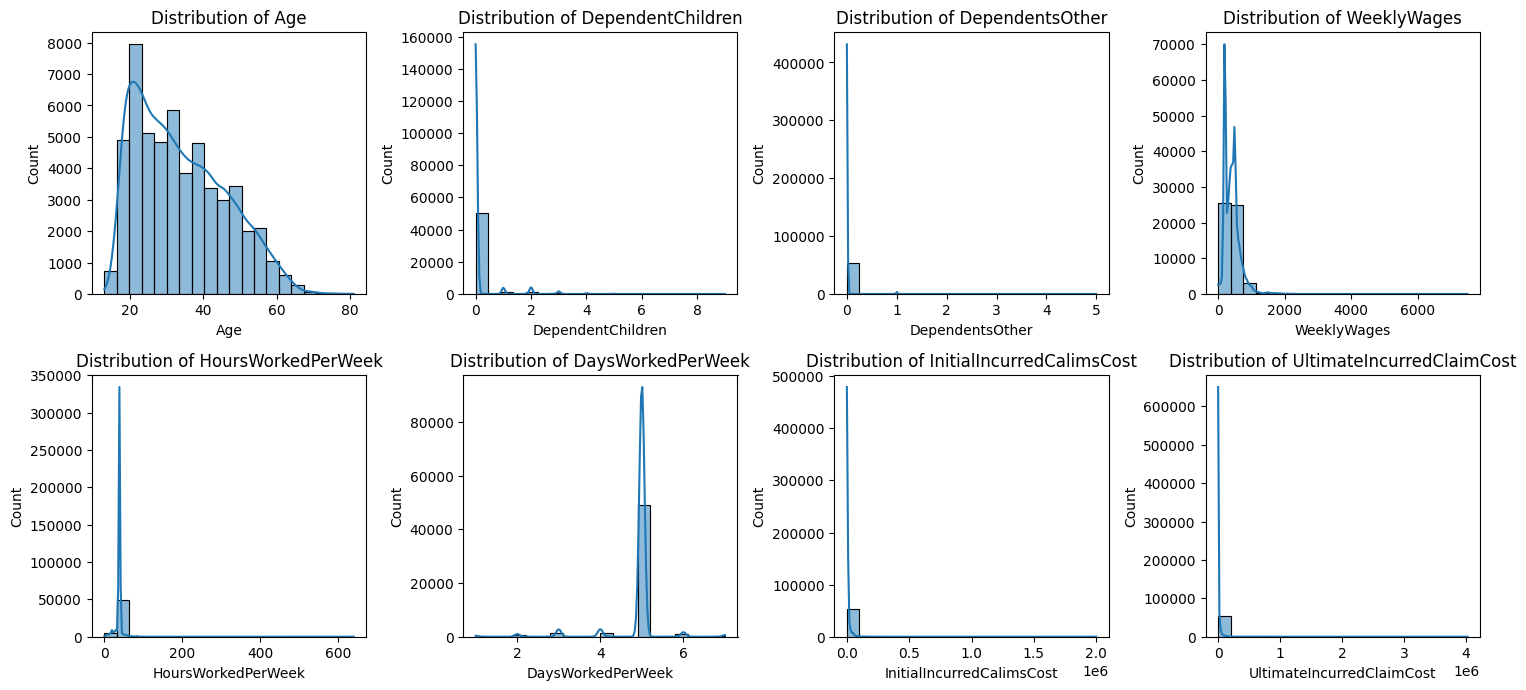

In [6]:
# Plotting histograms for numerical features
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, idx)
    sns.histplot(train_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Based histogram i get : 
- Features like "WeeklyWages," "HoursWorkedPerWeek," "InitialIncurredCalimsCost," and "UltimateIncurredClaimCost" exhibit significant skewness and potential outliers.
- "HoursWorkedPerWeek" has some instances where the values are considerably higher, which could be outliers.

In [7]:
# Calculating descriptive statistics for the "HoursWorkedPerWeek" feature
hours_worked_stats = train_data["HoursWorkedPerWeek"].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
hours_worked_stats

count    54000.000000
mean        37.735084
std         12.568704
min          0.000000
1%          10.000000
5%          22.381500
25%         38.000000
50%         38.000000
75%         40.000000
95%         40.000000
99%         60.000000
max        640.000000
Name: HoursWorkedPerWeek, dtype: float64

The maximum value of 640 hours is clearly an outlier, as it is significantly higher than the 99th percentile value of 60 hours. Method i suggest to fix the ourlier is Capping Method
Pros:
Can use domain knowledge or percentiles (e.g., 99th percentile) to cap values.
Does not rely on the assumption of normal distribution.
Cons:
Requires manual selection of the cap value, which may be arbitrary.
May lose some information if capping is too aggressive.

In [8]:
# Identify the 1st and 99th percentiles for "HoursWorkedPerWeek"
lower_bound = train_data['HoursWorkedPerWeek'].quantile(0.01)
upper_bound = train_data['HoursWorkedPerWeek'].quantile(0.99)

# Apply capping to the "HoursWorkedPerWeek" feature
train_data['HoursWorkedPerWeek'] = train_data['HoursWorkedPerWeek'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Check the distribution after capping
train_data['HoursWorkedPerWeek'].describe()

count    54000.000000
mean        37.428914
std          6.392101
min         10.000000
25%         38.000000
50%         38.000000
75%         40.000000
max         60.000000
Name: HoursWorkedPerWeek, dtype: float64

3. Feature Engineering

based dataset and learning domain knowledge, the feature that created is
- DateTime Conversion =  This is essential for the extraction of year, month, and day components.
- Time Components Extraction = These new features could capture some seasonality or trends in the data.
- Days to Report = calculates the number of days between the accident and the report. It could be a crucial feature, as the time taken to report an accident may have some correlation with the claim cost.
- Categorical encoding = categorical features Gender, MaritalStatus, and PartTimeFullTime are label encoded. Label encoding converts each unique category to an integer. Missing values, if any, are filled with 'Unknown' before encoding.
- Drop unnecessary columns = the original datetime columns and other text or identifier columns are dropped as they've either been transformed or are not used in the modeling process.

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

test_data = pd.read_csv('./dataset/test.csv')

def feature_engineering(df):
    """
    This function applies feature engineering transformations to the dataframe.
    """
    # Convert DateTimeOfAccident and DateReported to datetime type
    df['DateTimeOfAccident'] = pd.to_datetime(df['DateTimeOfAccident'])
    df['DateReported'] = pd.to_datetime(df['DateReported'])
    
    # Extract meaningful components from datetime columns
    df['AccidentYear'] = df['DateTimeOfAccident'].dt.year
    df['AccidentMonth'] = df['DateTimeOfAccident'].dt.month
    df['AccidentDay'] = df['DateTimeOfAccident'].dt.day
    df['ReportYear'] = df['DateReported'].dt.year
    df['ReportMonth'] = df['DateReported'].dt.month
    df['ReportDay'] = df['DateReported'].dt.day
    
    # Calculate the time difference between the accident and the report
    df['DaysToReport'] = (df['DateReported'] - df['DateTimeOfAccident']).dt.days
    
    # Encode categorical features using label encoding
    label_encoder = LabelEncoder()
    for col in ['Gender', 'MaritalStatus', 'PartTimeFullTime']:
        df[col].fillna('Unknown', inplace=True)  # Fill missing values if any
        df[col] = label_encoder.fit_transform(df[col])
    
    # Drop original datetime and text columns
    df.drop(columns=['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'ClaimDescription'], inplace=True)
    
    return df

# Apply the updated feature engineering function to the new train dataset
train_data = feature_engineering(train_data.copy())

# Prepare the test dataset with the same feature engineering steps
test_data = feature_engineering(test_data.copy())

#check the shape of the train and test data
print(train_data.shape)
print(test_data.shape)

# Displaying the data types of each column
data_types = test_data.dtypes

# Checking for missing values in each column
missing_values_test = test_data.isnull().sum()

# Combining the data types and missing values information
data_overview_test = pd.DataFrame({'Data Types': data_types, 'Missing Values': missing_values_test})
data_overview_test

(54000, 18)
(36000, 17)


,Data Types,Missing Values
Age,int64,0
Gender,int64,0
MaritalStatus,int64,0
DependentChildren,int64,0
DependentsOther,int64,0
WeeklyWages,float64,0
PartTimeFullTime,int64,0
HoursWorkedPerWeek,float64,0
DaysWorkedPerWeek,int64,0
InitialIncurredCalimsCost,int64,0


In [11]:
#show descriptive statistics for the test data after feature engineering
test_data.describe()

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,AccidentYear,AccidentMonth,AccidentDay,ReportYear,ReportMonth,ReportDay,DaysToReport
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.00000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,33.856556,0.775167,0.679639,0.120000,0.009611,416.37745,0.087944,37.758841,4.912417,7679.306889,1996.487417,6.499139,15.567556,1996.583028,6.613833,15.929111,37.780361
std,12.124416,0.417478,0.642190,0.522437,0.108357,242.49109,0.283218,11.951296,0.540451,17501.991600,5.188056,3.403999,8.681294,5.197705,3.394591,8.813996,57.767646
min,13.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1988.000000,1.000000,1.000000,1988.000000,1.000000,1.000000,-1.000000
25%,23.000000,1.000000,0.000000,0.000000,0.000000,200.00000,0.000000,38.000000,5.000000,650.000000,1992.000000,4.000000,8.000000,1992.000000,4.000000,8.000000,13.000000
50%,32.000000,1.000000,1.000000,0.000000,0.000000,395.18500,0.000000,38.000000,5.000000,2000.000000,1996.000000,7.000000,16.000000,1997.000000,7.000000,16.000000,22.000000
75%,43.000000,1.000000,1.000000,0.000000,0.000000,500.00000,0.000000,40.000000,5.000000,9500.000000,2001.000000,10.000000,23.000000,2001.000000,10.000000,24.000000,40.000000
max,80.000000,1.000000,3.000000,8.000000,5.000000,7400.00000,1.000000,700.000000,7.000000,725000.000000,2005.000000,12.000000,31.000000,2007.000000,12.000000,31.000000,1088.000000


In [12]:
#show descriptive statistics for the train data after feature engineering
train_data.describe()

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,AccidentYear,AccidentMonth,AccidentDay,ReportYear,ReportMonth,ReportDay,DaysToReport
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,5.400000e+04,5.400000e+04,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000
mean,33.842370,0.771556,0.681074,0.119185,0.009944,416.364807,0.090519,37.428914,4.905759,7.841146e+03,1.100337e+04,1996.508389,6.509870,15.650370,1996.607463,6.602741,15.955148,38.322759
std,12.122165,0.419923,0.642879,0.517780,0.109348,248.638669,0.286926,6.392101,0.552129,2.058408e+04,3.339099e+04,5.188254,3.401477,8.755167,5.201619,3.390912,8.822219,61.111756
min,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,1.000000,1.000000e+00,1.218868e+02,1988.000000,1.000000,1.000000,1988.000000,1.000000,1.000000,-1.000000
25%,23.000000,1.000000,0.000000,0.000000,0.000000,200.000000,0.000000,38.000000,5.000000,7.000000e+02,9.263384e+02,1992.000000,4.000000,8.000000,1992.000000,4.000000,8.000000,13.000000
50%,32.000000,1.000000,1.000000,0.000000,0.000000,392.200000,0.000000,38.000000,5.000000,2.000000e+03,3.371242e+03,1997.000000,7.000000,16.000000,1997.000000,7.000000,16.000000,21.000000
75%,43.000000,1.000000,1.000000,0.000000,0.000000,500.000000,0.000000,40.000000,5.000000,9.500000e+03,8.197249e+03,2001.000000,9.000000,23.000000,2001.000000,10.000000,24.000000,40.000000
max,81.000000,2.000000,2.000000,9.000000,5.000000,7497.000000,1.000000,60.000000,7.000000,2.000000e+06,4.027136e+06,2005.000000,12.000000,31.000000,2006.000000,12.000000,31.000000,1094.000000


4. Dataset Export that ready to use

In [13]:
#save dataframe to csv
train_data.to_csv('./dataset/train_data_fix.csv', index=False)
test_data.to_csv('./dataset/test_data_fix.csv', index=False)

The result of dataset get :
1. No missing values are observed.
2. The data types appear to be appropriate for each feature.
3. Time Components: We extracted year, month, and day from DateTimeOfAccident and DateReported. This could help us understand if there are seasonal patterns or yearly trends in the claim costs.
4. Days to Report: The time difference between the accident and the report date could be an important feature. It may indicate the severity of the accident or the efficiency of the claim reporting system.
5. Categorical Features: Encoding categorical variables like Gender, MaritalStatus, and PartTimeFullTime allows us to include these potentially important factors in our model.

What We Can Test:
Feature Importance: After training the model, we can examine feature importances to see which engineered features are most impactful. This will give us an idea of what variables are strong predictors of the ultimate incurred claim cost.

Correlation: We can perform correlation analysis between the new features and the target variable to understand their relationship better.

Model Performance: By comparing the performance metrics (like RMSE) of models trained with and without the engineered features, we can get an empirical understanding of their usefulness.